<a href="https://colab.research.google.com/github/aryansharma9466/mnistdatasetrecognition/blob/main/ggdc_digitsrecognition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing necessary packages


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,Dense

In [ ]:
!ls

sample_data


In [ ]:
# Add your notebook file to the staging area using the correct path
!git add /content/ggdc_digitsrecognition1.ipynb

fatal: pathspec '/content/ggdc_digitsrecognition1.ipynb' did not match any files


In [ ]:
# List all files in the /content directory to find the correct notebook path
!ls /content/

sample_data


# ## loading and preprocessing datasets


In [ ]:
(X_train,Y_train),(X_test , Y_test )= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# shapes of traning and test dataset sets
print(f"X_train shape:{X_train.shape}")
print(f"Y_train shape:{Y_train.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"Y_test shape:{Y_test.shape}")


X_train shape:(60000, 28, 28)
Y_train shape:(60000,)
X_test shape:(10000, 28, 28)
Y_test shape:(10000,)


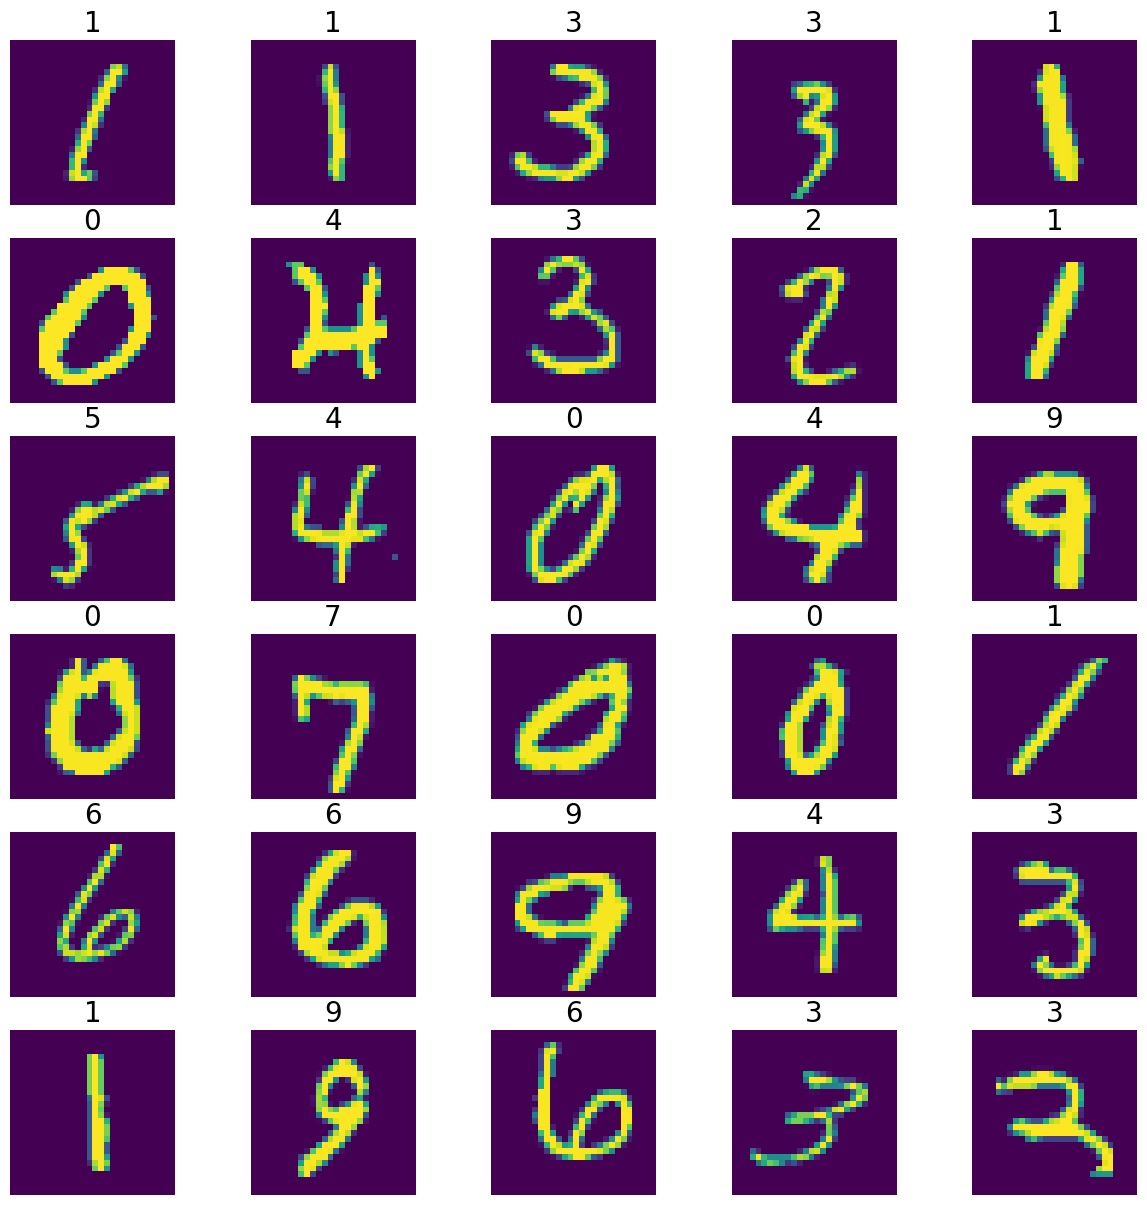

In [ ]:
#visualization of random figures in dataset
import numpy as np
fig , axes = plt.subplots(6,5,figsize=(15,15))
axes=axes.flatten()
idx= np.random.randint(0,60000,size=30)
for i in  range(30):
  axes[i].imshow(X_train[idx[i],:].reshape(28,28))
  axes[i].axis('off')
  axes[i].set_title(str(int(Y_train[idx[i]])), color='k',fontsize=20)
plt.show()



In [ ]:
#specify dimension for images
X_train= X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")


X_train shape:(60000, 28, 28, 1)
X_test shape:(10000, 28, 28, 1)


In [ ]:
Y_train=tf.keras.utils.to_categorical(Y_train,10) # its needed why we are doing loss='categorical_crossentropy' because we use labels to classify
Y_test=tf.keras.utils.to_categorical(Y_test,10)
print(f"Y_train shape:{Y_train.shape}")
print(f"Y_test shape:{Y_test.shape}")

Y_train shape:(60000, 10)
Y_test shape:(10000, 10)


In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
#converting to float number
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
# normalizing from (0,255) to (0,1)
X_train/=255
X_test/=255

# model development

In [ ]:
# usning LeNet-5 for my model development
# General formaula for matrix n*n with kernel/filters f*f , padding P*P and stride  S*S is  (n-f+2p/s)+1


from tensorflow.keras.layers import AveragePooling2D
model=Sequential([
    Conv2D(6,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)),
    AveragePooling2D(pool_size=(2,2)),
    Conv2D(16,kernel_size=(5,5),activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120,activation='relu'),
    Dense(84,activation='relu'),
    Dense(10,activation='softmax')

])

In [ ]:
# summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#adam is good optimizer due to its structure basically comprises from RMSprop and momentum
# Automatically adjusts the learning rate for each parameter

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7510 - loss: 0.7756 - val_accuracy: 0.9579 - val_loss: 0.1387
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9590 - loss: 0.1355 - val_accuracy: 0.9671 - val_loss: 0.0982
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.0918 - val_accuracy: 0.9771 - val_loss: 0.0709
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9781 - loss: 0.0697 - val_accuracy: 0.9820 - val_loss: 0.0590
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9830 - loss: 0.0553 - val_accuracy: 0.9856 - val_loss: 0.0480
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9857 - loss: 0.0460 - val_accuracy: 0.9851 - val_loss: 0.0457
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9863 - val_loss: 0.0408
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0

In [ ]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9818 - loss: 0.0546


[0.04395652934908867, 0.9854000210762024]

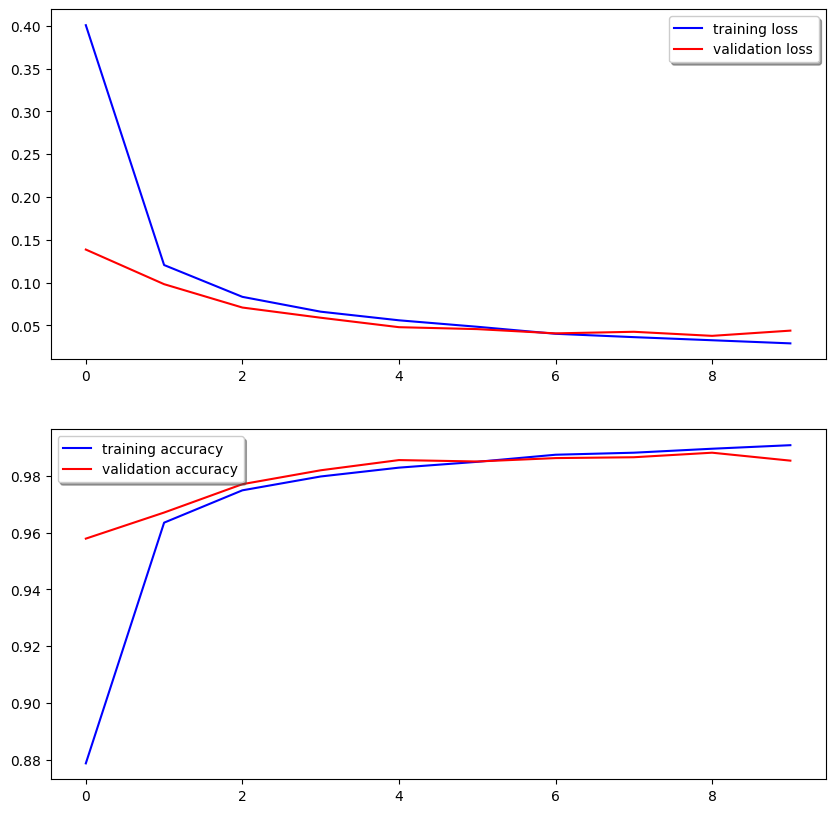

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(10,10))
axes[0].plot(history.history['loss'],color='b',label='training loss')
axes[0].plot(history.history['val_loss'],color='r',label='validation loss')
axes[0].legend(loc='best',shadow=True)
axes[1].plot(history.history['accuracy'],color='b',label='training accuracy')
axes[1].plot(history.history['val_accuracy'],color='r',label='validation accuracy')
axes[1].legend(loc='best',shadow=True)



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_image.png to sample_image.png


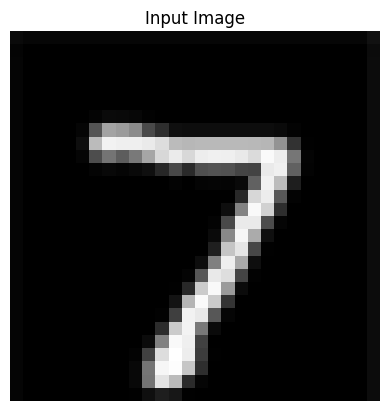

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
predicted digit :7


In [ ]:
# code to import image from database to see if image is valid or not
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = list(uploaded.keys())[0]
image=Image.open(image_path).convert('L')
image=image.resize((28,28))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Input Image")
plt.show()
image_array = np.array(image).astype('float32') / 255.0

if image_array.mean() > 0.5:
  image_array=1-image_array
image_array=image_array.reshape(1,28,28,1)
pred=model.predict(image_array)
predicted_digit=np.argmax(pred)
print(f"predicted digit :{predicted_digit}")
